# Cleaning and preprocessing

### 1. Import necessary modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# preprocessing and evaluation
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# hyperparameter tuning
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

### 2. Load Train and Test Data

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df_train.shape

(31647, 18)

In [6]:
df_train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [8]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


### 3. Check for Null values

In [9]:
df_train.isna().sum()

,0
ID,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0


## Feature Selection and EDA

### 1. Distribution of Data

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>, <Axes: >]], dtype=object)

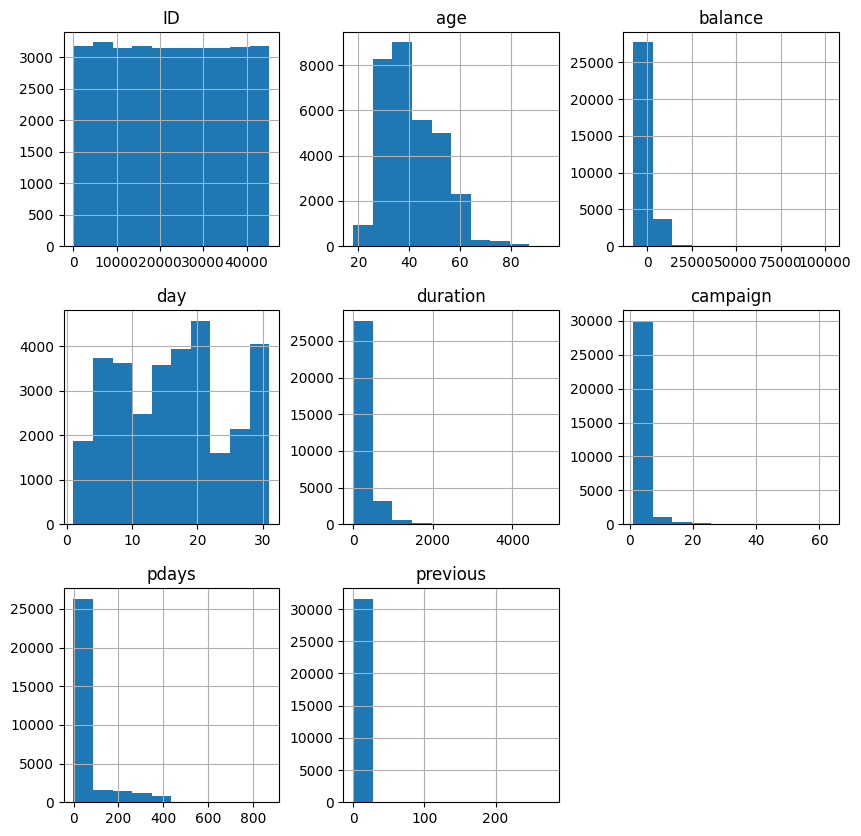

In [10]:
df_train.hist(figsize=(10,10))

### 2. Encoding categorical to numerical using Label Encoder

In [11]:
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_train_corr =  df_train.copy()

# function to encode categorical column
def label_encode(df):
    for col in df.columns:
        # check for column type object
        if df[col].dtype == 'object':
            # encode the column
            df[col] = le.fit_transform(df[col])
    return df

# assign encoded dataframe
df_train_corr = label_encode(df_train_corr)

In [12]:
df_train_corr.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0


### 3. Checking for Multicollinearity

<Axes: >

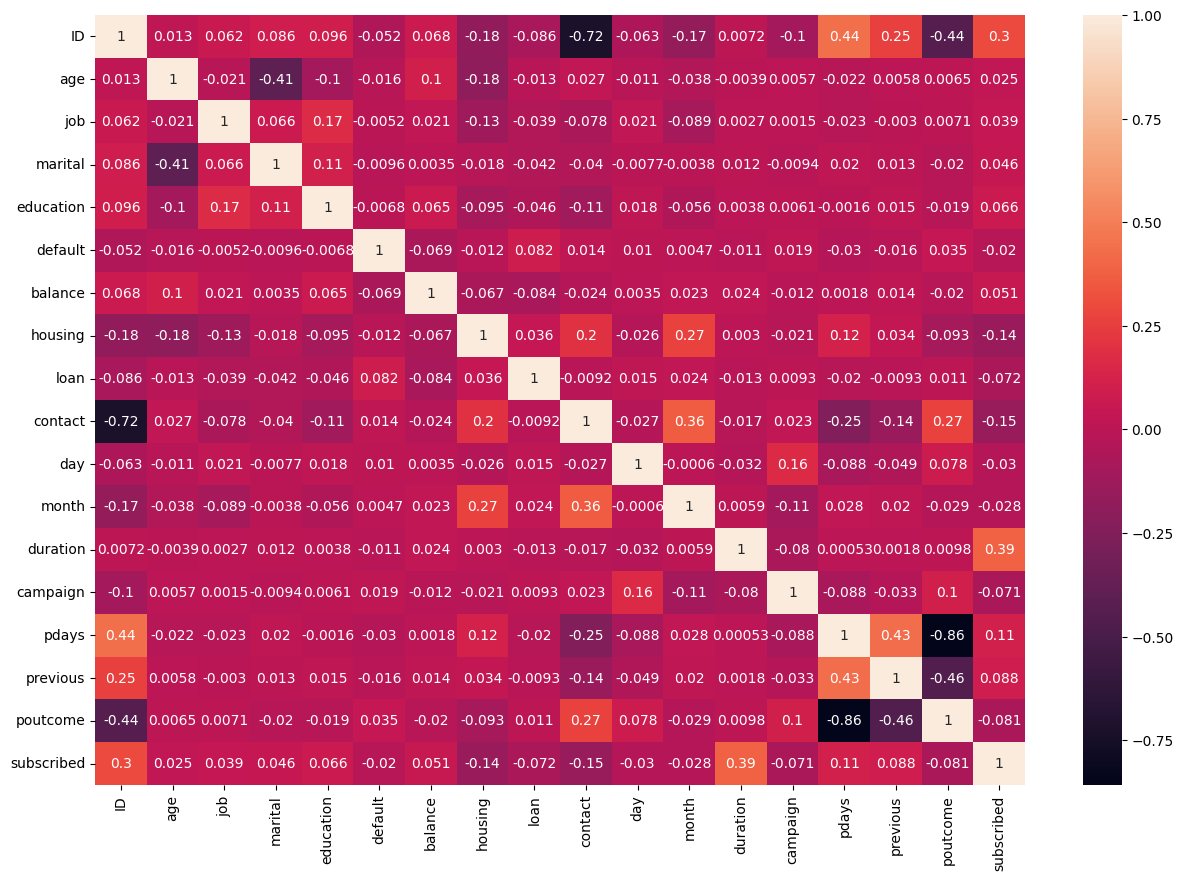

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train_corr.corr(), annot=True)

In [14]:
# let's not include ID column in the data, because it is irrelevant

df_train.drop('ID', axis=1, inplace=True)
df_test.drop('ID', axis=1, inplace=True)


In [15]:
df_train.shape

(31647, 17)

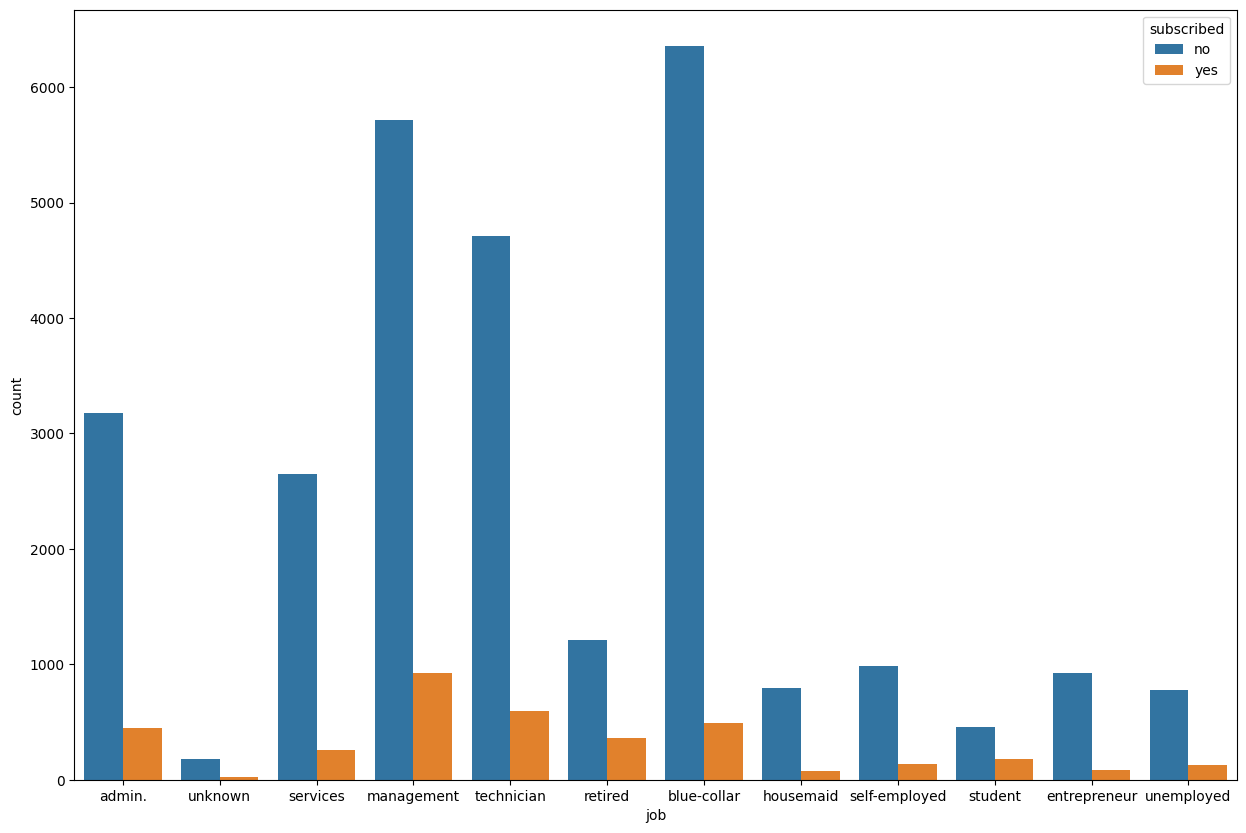

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'job', data = df_train, hue = 'subscribed')
plt.show()

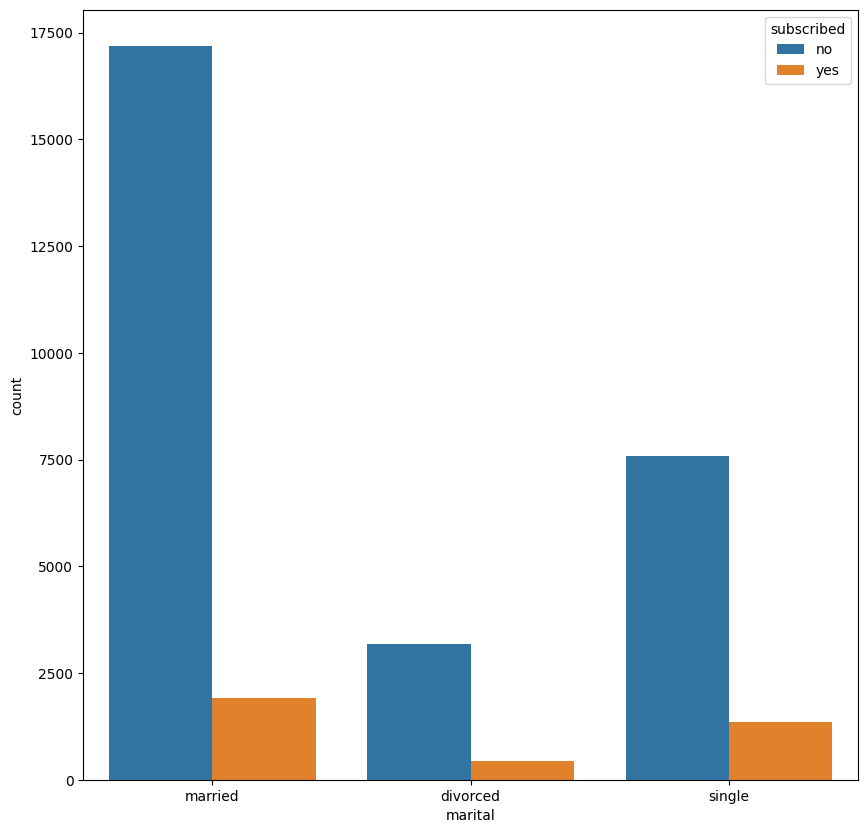

In [17]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'marital', data = df_train, hue = 'subscribed')
plt.show()

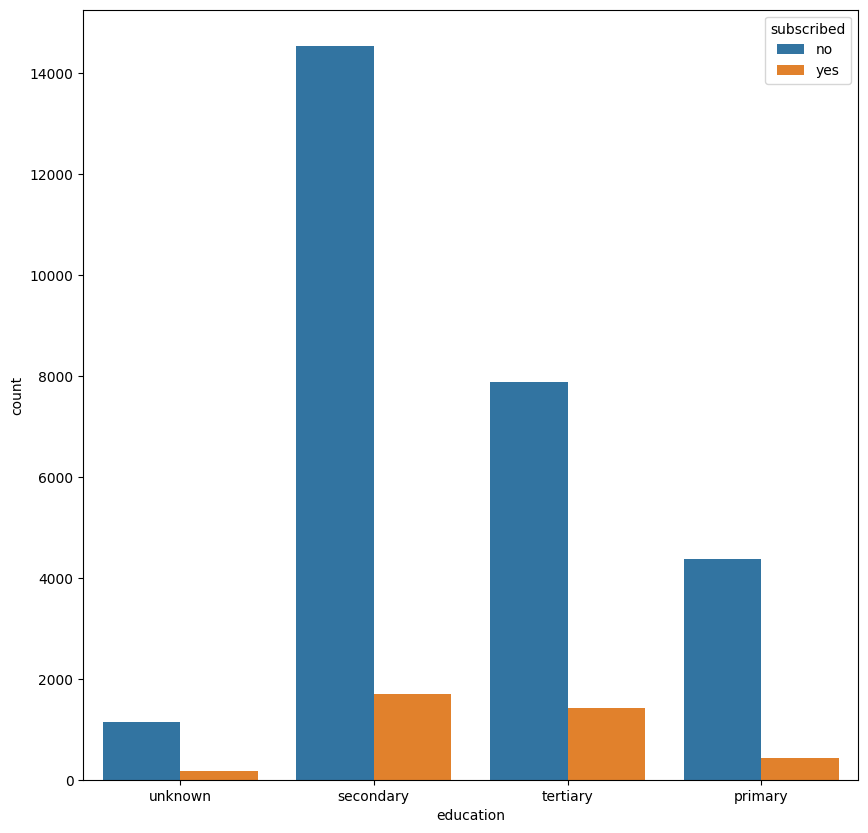

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'education', data = df_train, hue = 'subscribed')
plt.show()

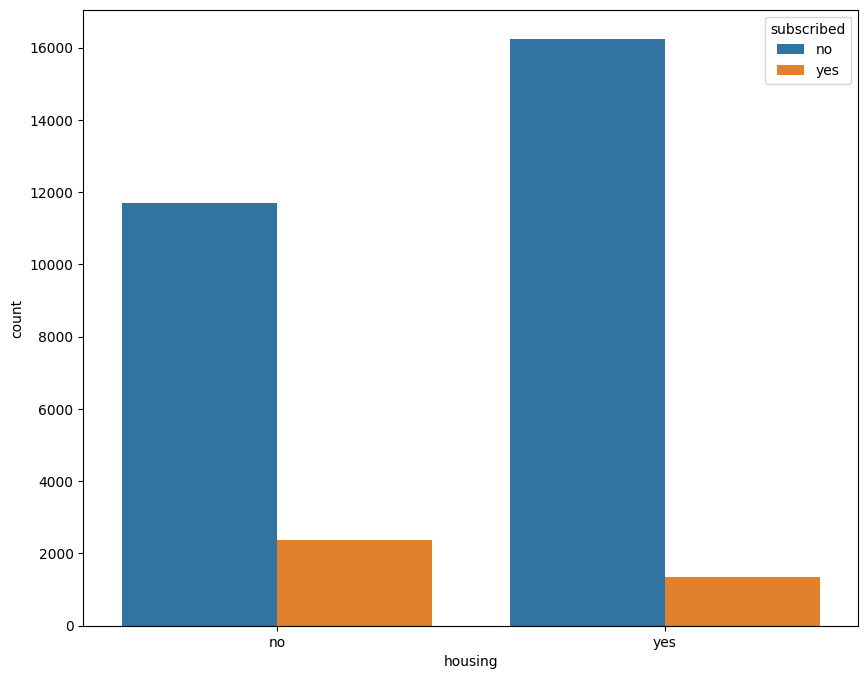

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'housing', data = df_train, hue = 'subscribed')
plt.show()

## Featue Engineering

In [20]:
# encode both the train and test data

df_train = label_encode(df_train)
df_test = label_encode(df_test)

In [21]:
# Split target and features from Train data
df_train_x = df_train.drop('subscribed', axis=1)
df_train_y = df_train['subscribed']

In [22]:
# scaling the data

scaler = StandardScaler()
df_train_x = pd.DataFrame(scaler.fit_transform(df_train_x), columns=df_train_x.columns)
df_test = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)

df_train_x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.415793,-1.324317,-0.275405,2.369229,-0.137234,0.187933,-1.118201,-0.439893,0.395076,0.379579,1.154007,-0.832754,-0.245906,-0.408555,-0.237059,0.441777
1,-0.937156,2.037729,-0.275405,-0.300345,-0.137234,-0.449397,-1.118201,-0.439893,-0.716695,0.499526,-0.177462,-0.649957,-0.245906,-0.408555,-0.237059,0.441777
2,-1.313627,0.815167,-0.275405,-0.300345,-0.137234,-0.156159,0.894294,-0.439893,-0.716695,0.259631,-0.177462,-0.070449,-0.567059,-0.408555,-0.237059,0.441777
3,1.509911,-0.101755,-1.922374,1.034442,-0.137234,0.635055,-1.118201,-0.439893,-0.716695,0.739422,0.155405,2.368149,-0.567059,0.447299,1.001336,-0.576498
4,-0.937156,1.426448,-0.275405,-0.300345,-0.137234,-0.411091,0.894294,-0.439893,-0.716695,-1.419637,-0.843197,0.474054,-0.567059,-0.408555,-0.237059,0.441777


### SMOTE(Synthetic Minority Oversampling Technique)

As there is imbalance in the dataset, we are using this oversampling technique to generate equal sample of minority class 'Yes' in the dataset.

In [23]:
sm = SMOTE(random_state=42)
df_train_x, df_train_y = sm.fit_resample(df_train_x, df_train_y)
df_train_x = pd.DataFrame(df_train_x, columns=df_train_x.columns)
df_train_y_values = pd.DataFrame(df_train_y, columns=['subscribed'])
print('the number of samples in each class after oversampling', len(df_train_x))
print(df_train_y_values['subscribed'].value_counts())

the number of samples in each class after oversampling 55864
subscribed
0    27932
1    27932
Name: count, dtype: int64


# Model Building

### 1.Build and Evaluate ML models using StratifiedKFold Cross Validation

In [24]:
# list of models
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

# store the accuracy score
results = []

for name, model in models:
    # random sampling using StratifiedKFold method
    kfold = StratifiedKFold(n_splits=10, random_state= 42, shuffle = True)
    cv_results = cross_val_score(model, df_train_x, df_train_y, cv=kfold, scoring='accuracy')
    print(f'{name}: {cv_results.mean()}')
    results.append((name, cv_results.mean()))


LR: 0.8129205784411682
DT: 0.9127880492865803
RF: 0.9505047168792625
GB: 0.9134146573572954


### 2. Build an Artificial Neural Network DL Model

In [25]:
# import tensorflow and keras models
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


In [26]:
# split the df_train data into train and test
train_x_train, train_x_test, train_y_train, train_y_test = train_test_split(df_train_x, df_train_y, test_size=0.2, random_state=42)

In [27]:
# adding mutilayer perceptor to a sequential neural network
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(train_x_train.shape[1],)))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# compile the model with gradient descent
nn_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Fit the model
nn_model.fit(train_x_train, train_y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6776 - loss: 0.6026 - val_accuracy: 0.8172 - val_loss: 0.4290
Epoch 2/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8131 - loss: 0.4232 - val_accuracy: 0.8288 - val_loss: 0.4032
Epoch 3/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8273 - loss: 0.4020 - val_accuracy: 0.8334 - val_loss: 0.3909
Epoch 4/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8322 - loss: 0.3901 - val_accuracy: 0.8364 - val_loss: 0.3861
Epoch 5/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8330 - loss: 0.3866 - val_accuracy: 0.8395 - val_loss: 0.3780
Epoch 6/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8348 - loss: 0.3764 - val_accuracy: 0.8391 - val_loss: 0.3746
Epoch 7/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8389 - loss: 0.3703 - val_accuracy: 0.8442 - val_loss: 0.3711
Epoch 8/10
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8407 - loss: 0.3697 - 

In [31]:
# evaluate the model accuracy
nn_results = nn_model.evaluate(train_x_test, train_y_test)

print(f'Test Loss: {nn_results[0]}')
print(f'Test Accuracy: {nn_results[1]}')

350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8433 - loss: 0.3668
Test Loss: 0.3688878118991852
Test Accuracy: 0.8408663868904114


In [37]:
train_y_test_pred = nn_model.predict(train_x_test)
print(classification_report(train_y_test, train_y_test_pred.round()))

350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      5603
           1       0.81      0.89      0.85      5570

    accuracy                           0.84     11173
   macro avg       0.84      0.84      0.84     11173
weighted avg       0.84      0.84      0.84     11173



In [32]:
results.append(('NN', nn_results[1]))

In [33]:
for name, score in results:
    print(f'{name}: {score}')

LR: 0.8129205784411682
DT: 0.9127880492865803
RF: 0.9505047168792625
GB: 0.9134146573572954
NN: 0.8408663868904114


1. Out of all the model, Random Forest comparatively perform better than all models. So, I'm picking Random Forest to train my Model

### 3. Hyperparameter tuning of Random Forest

In [34]:
param_dist = {
    "max_depth": [3, None],
    "max_features": randint(1, 9),
    "min_samples_leaf": randint(1, 9),
    "criterion": ["gini", "entropy"]
}


RSCV = RandomizedSearchCV(RandomForestClassifier(), param_dist, cv=5, random_state=42)
RSCV.fit(df_train_x, df_train_y)
print(f'RandomForestClassifier best Score: {RSCV.best_score_} ')


RandomForestClassifier best Score: 0.9439892083586369 


As you can see the report denotes the Test Accuraccy as 94%, Now let's predict the unlabled Test data.

In [38]:
# predict the test data and save the test data predictions as submission.csv file
df_test_pred = RSCV.predict(df_test)

df_test_pred = pd.DataFrame(df_test_pred, columns=['subscribed'])
df_test_pred.to_csv('submission.csv', index=False)